<a href="https://colab.research.google.com/github/KenaMuigai/kaggle/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
import plotly.graph_objects as go
import time

ModuleNotFoundError: No module named 'lightgbm'

In [2]:
!pip install lightgbm

from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.simplefilter(action="ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.6 MB/s eta 0:00:00


ModuleNotFoundError: No module named 'xgboost'

In [3]:
!pip install xgboost

from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import precision_recall_curve, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 2.7 MB/s eta 0:00:00


In [4]:
!pip install catboost
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.1 MB/s eta 0:00:00


In [5]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

# Now read your dataset
df = pd.read_csv('/content/drive/MyDrive/Telco_Customer_Churn.csv')

Mounted at /content/drive


eda

In [7]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    numeric_df = df.select_dtypes(include='number')
    # quantile() işlemi
    quantiles = numeric_df.describe([0, 0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1]).T
    print(quantiles)

In [8]:
check_df(df)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
                     ...   
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
Length: 21, dtype: object
##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines  \
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service   
1  5575-GNVDE    Male              0      No         No      34          Yes                No   
2  3668-QPYBK    Male              0      No         No       2          Yes                No   
3  7795-CFOCW    Male              0      No         No      45           No  No phone service   
4  9237-HQITU  F

In [10]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [11]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype("O")

In [12]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [13]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [14]:
df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0})

<ipython-input-14-61589884817d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0})


In [15]:
df["InternetService"] = df["InternetService"].replace({"DSL": 1, "Fiber optic": 1, "No": 0})

<ipython-input-15-c341b8c6ca32>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["InternetService"] = df["InternetService"].replace({"DSL": 1, "Fiber optic": 1, "No": 0})


In [16]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,1,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,0,0,34,1,No,1,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,0,0,2,1,No,1,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,1,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,0,0,2,1,No,1,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,Yes,1,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.800,1990.500,0
7039,2234-XADUH,Female,0,1,1,72,1,Yes,1,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.200,7362.900,0
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,1,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.600,346.450,0
7041,8361-LTMKD,Male,1,1,0,4,1,Yes,1,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.400,306.600,1


categorical variables

In [17]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')


    return cat_cols, num_cols, cat_but_car, num_but_cat



In [18]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 7


In [19]:
cat_cols

['gender',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'InternetService',
 'PaperlessBilling',
 'Churn']

In [20]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [21]:
cat_but_car

['customerID']

In [22]:
num_but_cat

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'InternetService',
 'PaperlessBilling',
 'Churn']

In [23]:
cat_cols = [col for col in cat_cols if col not in ["Churn"]]

analysis categorical variables

In [24]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [25]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")
        plt.show(block=True)

        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524
##########################################


<ipython-input-25-9625f14935fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")


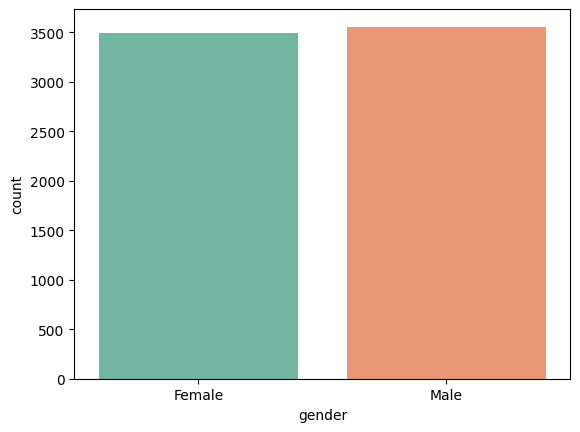

                  MultipleLines  Ratio
MultipleLines                         
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##########################################


<ipython-input-25-9625f14935fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")


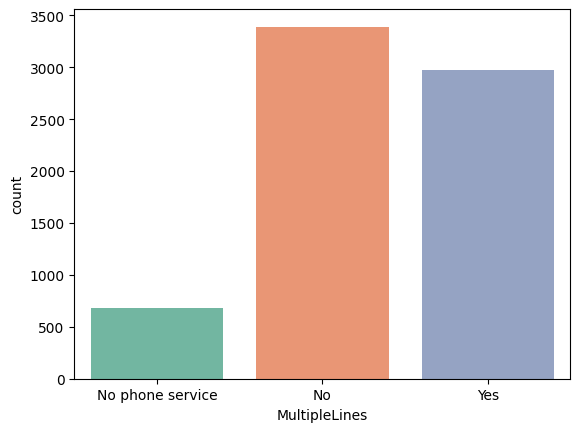

                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
##########################################


<ipython-input-25-9625f14935fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")


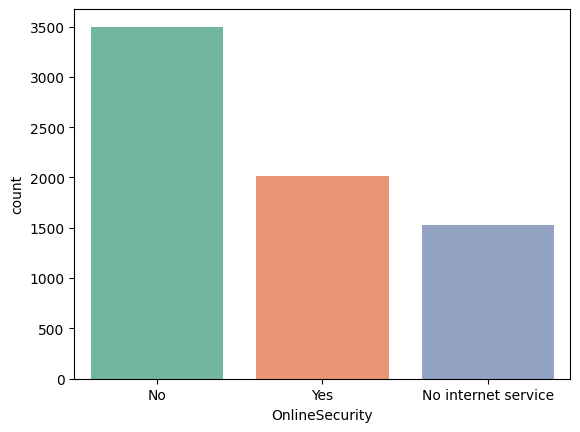

                     OnlineBackup  Ratio
OnlineBackup                            
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
##########################################


<ipython-input-25-9625f14935fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")


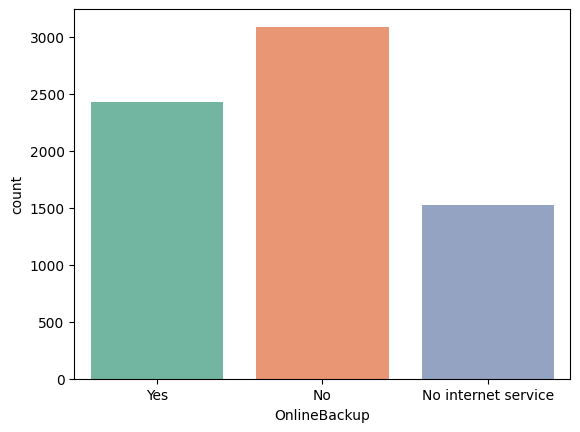

                     DeviceProtection  Ratio
DeviceProtection                            
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
##########################################


<ipython-input-25-9625f14935fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")


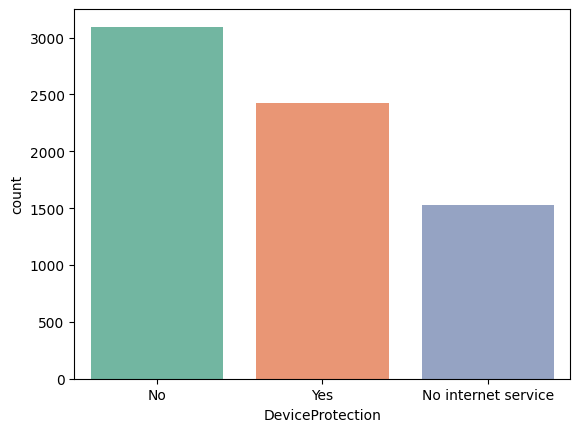

                     TechSupport  Ratio
TechSupport                            
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
##########################################


<ipython-input-25-9625f14935fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")


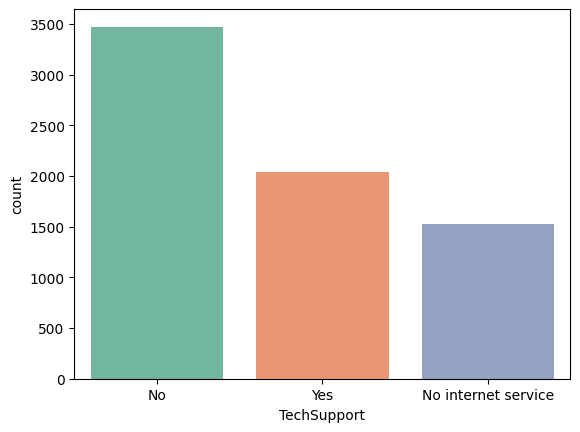

                     StreamingTV  Ratio
StreamingTV                            
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
##########################################


<ipython-input-25-9625f14935fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")


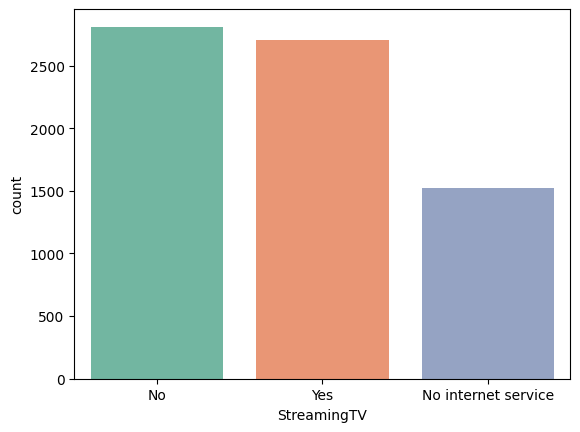

                     StreamingMovies  Ratio
StreamingMovies                            
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
##########################################


<ipython-input-25-9625f14935fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")


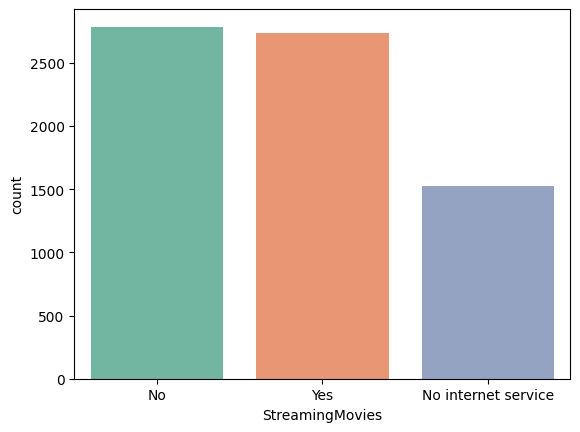

                Contract  Ratio
Contract                       
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
##########################################


<ipython-input-25-9625f14935fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")


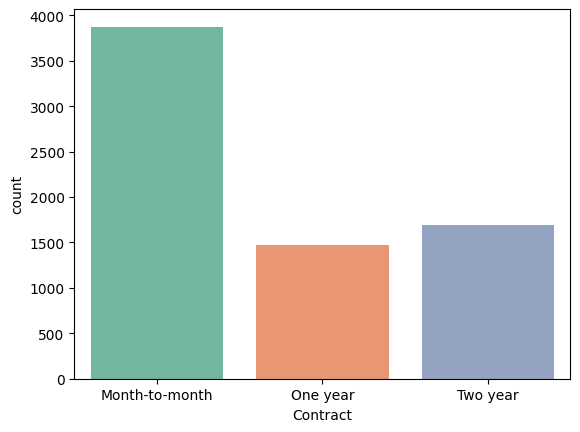

                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
##########################################


<ipython-input-25-9625f14935fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")


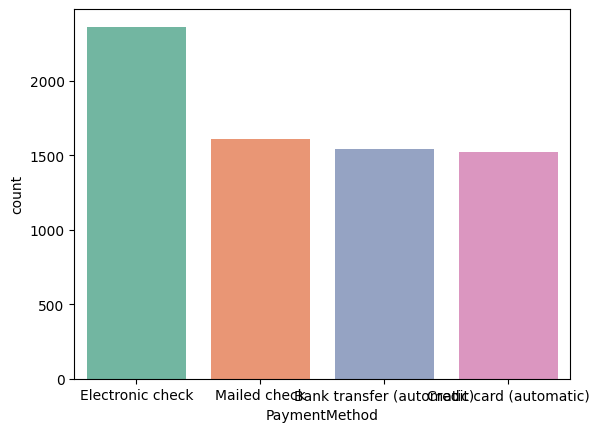

               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901 83.785
1                       1142 16.215
##########################################


<ipython-input-25-9625f14935fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")


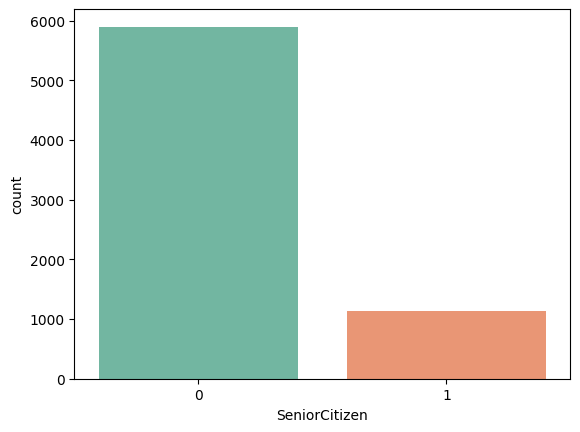

         Partner  Ratio
Partner                
0           3641 51.697
1           3402 48.303
##########################################


<ipython-input-25-9625f14935fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")


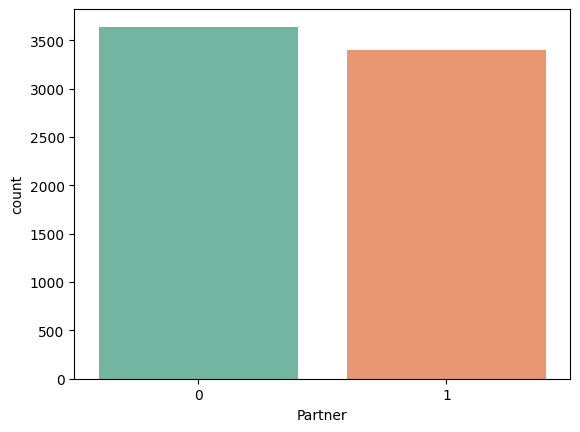

            Dependents  Ratio
Dependents                   
0                 4933 70.041
1                 2110 29.959
##########################################


<ipython-input-25-9625f14935fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")


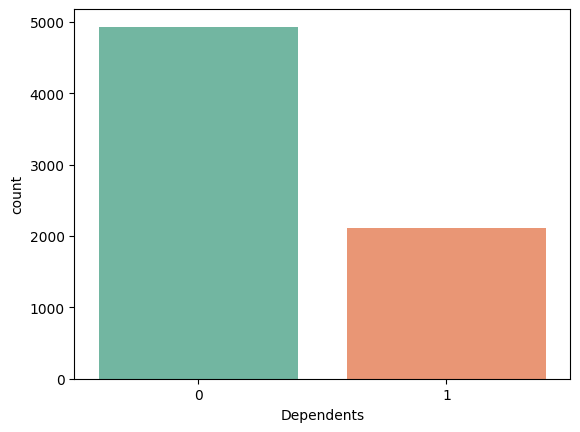

              PhoneService  Ratio
PhoneService                     
1                     6361 90.317
0                      682  9.683
##########################################


<ipython-input-25-9625f14935fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")


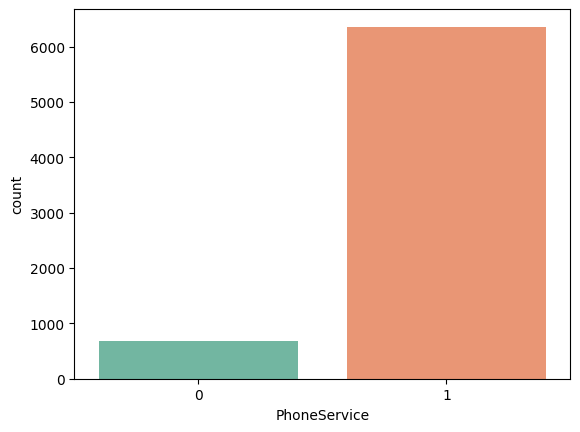

                 InternetService  Ratio
InternetService                        
1                           5517 78.333
0                           1526 21.667
##########################################


<ipython-input-25-9625f14935fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")


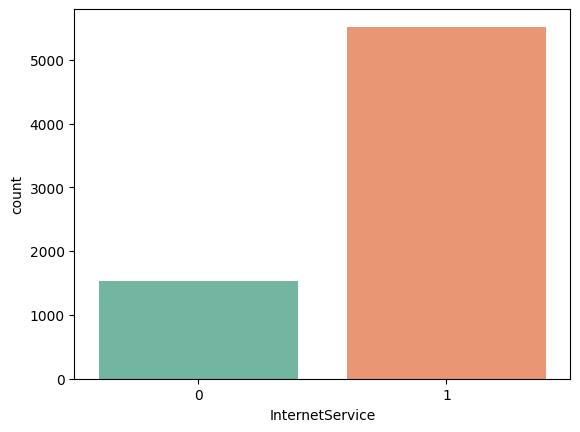

                  PaperlessBilling  Ratio
PaperlessBilling                         
1                             4171 59.222
0                             2872 40.778
##########################################


<ipython-input-25-9625f14935fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")


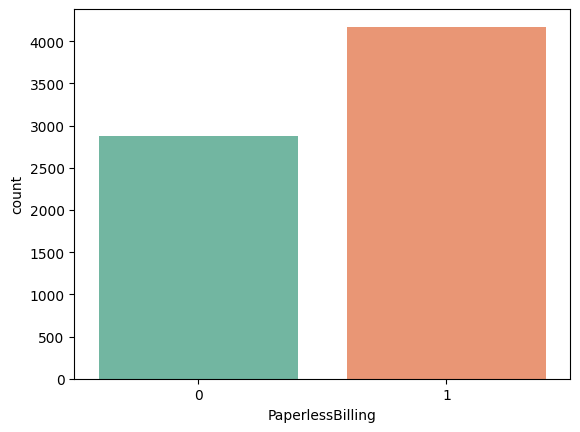

In [26]:


for col in cat_cols:
    cat_summary(df, col, plot=True)



analysis numerical variables

In [27]:
def num_summary(dataframe, col_name, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)

    if plot:
        sns.histplot(data=dataframe, x=col_name, bins=20, kde=True, color="blue")
        plt.show(block=True)

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


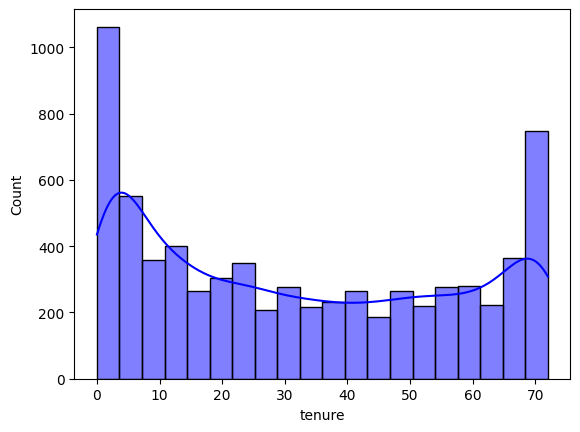

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


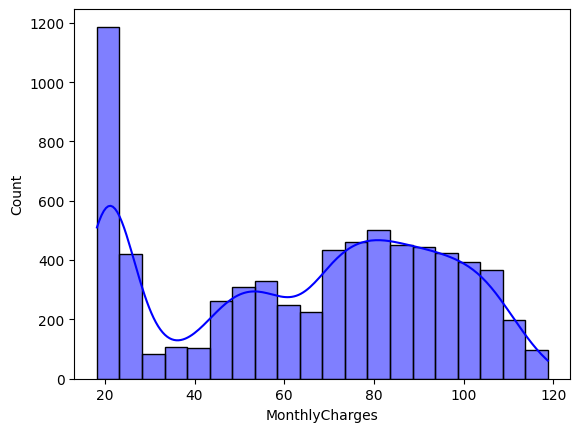

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


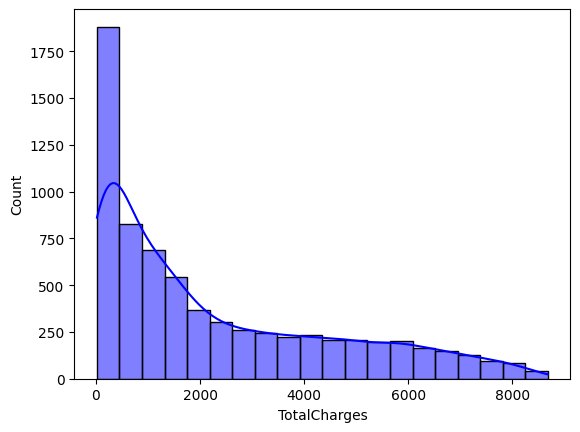

In [28]:


for col in num_cols:
    num_summary(df, col, plot=True)



analysis by categorical variables

In [29]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe, palette="Set2")
        plt.show(block=True)

In [30]:


for col in cat_cols:
    target_summary_with_cat(df, "Churn", col, plot=False)



        TARGET_MEAN
gender             
Female        0.269
Male          0.262


                  TARGET_MEAN
MultipleLines                
No                      0.250
No phone service        0.249
Yes                     0.286


                     TARGET_MEAN
OnlineSecurity                  
No                         0.418
No internet service        0.074
Yes                        0.146


                     TARGET_MEAN
OnlineBackup                    
No                         0.399
No internet service        0.074
Yes                        0.215


                     TARGET_MEAN
DeviceProtection                
No                         0.391
No internet service        0.074
Yes                        0.225


                     TARGET_MEAN
TechSupport                     
No                         0.416
No internet service        0.074
Yes                        0.152


                     TARGET_MEAN
StreamingTV                     
No                         0.335

analysis numerical variables

In [31]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)

In [32]:


for col in num_cols:
    target_summary_with_num(df, "Churn", col, plot=False)



       tenure_mean
Churn             
0           37.570
1           17.979


       MonthlyCharges_mean
Churn                     
0                   61.265
1                   74.441


       TotalCharges_mean
Churn                   
0               2555.344
1               1531.796




corr analysis

In [33]:
corr = df[num_cols].corr()

In [34]:
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000,0.248,0.826
MonthlyCharges,0.248,1.000,0.651
TotalCharges,0.826,0.651,1.000


In [35]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    # Only numerical columns
    numeric_df = dataframe.select_dtypes(include=[np.number])

    # Correlation matrix
    corr = numeric_df.corr()
    cor_matrix = corr.abs()

    # Select upper triangular matrix (to remove unnecessary repetitions)
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

    # Let's select the column pairs whose correlation is higher than the threshold
    high_corrs = [(col, row)
                  for col in cor_matrix.columns
                  for row in cor_matrix.index
                  if not pd.isna(upper_triangle_matrix.loc[row, col]) and abs(
            upper_triangle_matrix.loc[row, col]) > corr_th]

    if plot:
        # Heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu")
        plt.title("Correlation Heat Map")
        plt.show()

    return high_corrs



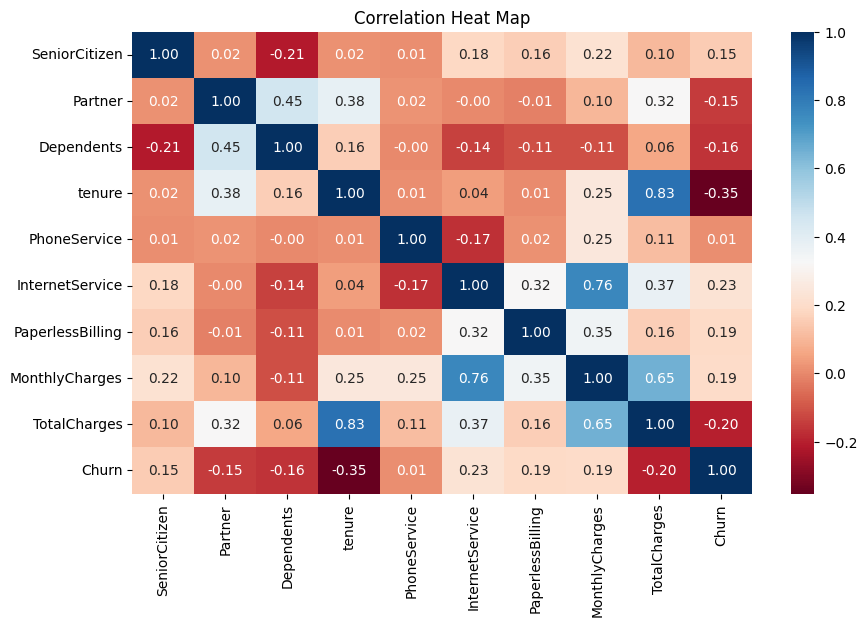

[('MonthlyCharges', 'InternetService'), ('TotalCharges', 'tenure')]

In [36]:
high_correlated_cols(df, plot=True)

distribution dependent var

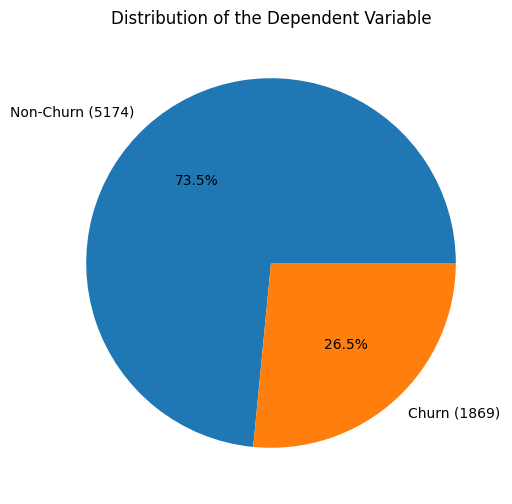

In [37]:


# Calculate the counts of each outcome
outcome_counts = df['Churn'].value_counts()

# Calculate the total number of patients
total_patients = outcome_counts.sum()

# Calculate the percentages
percentages = outcome_counts / total_patients * 100

# Create labels with both quantity and percentage
labels = [f'Non-Churn ({outcome_counts[0]})',
          f'Churn ({outcome_counts[1]})']

# Plot the pie chart with labels and percentages
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of the Dependent Variable')
plt.show()



Examining the Logarithm of the Dependent Variable¶

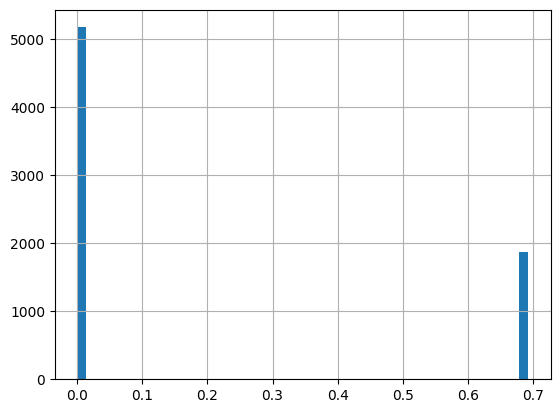

In [38]:
np.log1p(df['Churn']).hist(bins=50)
plt.show(block=True)

Feature Engineering¶

    Missing Values Detection
    Outlier Detection (Outliers)
    Feature Extraction




14. Missing Value Analysis¶


In [39]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
...,...
PaperlessBilling,0
PaymentMethod,0
MonthlyCharges,0
TotalCharges,11


In [40]:


def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns



In [41]:
na_columns = missing_values_table(df, na_name=True)

              n_miss  ratio
TotalCharges      11  0.160


In [42]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

In [43]:
missing_vs_target(df, "Churn", na_columns)

                      TARGET_MEAN  Count
TotalCharges_NA_FLAG                    
0                           0.266   7032
1                           0.000     11




In [44]:


df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)



<ipython-input-44-fe3dad5f82d8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)


In [45]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
...,...
PaperlessBilling,0
PaymentMethod,0
MonthlyCharges,0
TotalCharges,0



15. Outlier Analysis¶


In [46]:


def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit



In [47]:


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False



In [48]:
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


Base Model

In [49]:
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Churn"]]

In [51]:
# One-Hot-Encoding

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [52]:
dff = one_hot_encoder(dff, cat_cols)

In [53]:
dff.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,InternetService_0,InternetService_1,PaperlessBilling_0,PaperlessBilling_1
0,7590-VHVEG,1,29.850,29.850,0,True,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,True,False,True,False,False,True,False,True
1,5575-GNVDE,34,56.950,1889.500,0,False,True,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False
2,3668-QPYBK,2,53.850,108.150,1,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,True,False,True,False,True,False,False,True,False,True,False,True
3,7795-CFOCW,45,42.300,1840.750,0,False,True,False,True,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,True,False,True,False,True,False,False,True,True,False
4,9237-HQITU,2,70.700,151.650,1,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True


In [54]:
scaler = RobustScaler()

In [55]:
dff[num_cols] = scaler.fit_transform(dff[num_cols])

In [56]:
dff.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,InternetService_0,InternetService_1,PaperlessBilling_0,PaperlessBilling_1
0,7590-VHVEG,-0.609,-0.745,-0.405,0,True,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,True,False,True,False,False,True,False,True
1,5575-GNVDE,0.109,-0.247,0.144,0,False,True,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False
2,3668-QPYBK,-0.587,-0.304,-0.382,1,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,True,False,True,False,True,False,False,True,False,True,False,True
3,7795-CFOCW,0.348,-0.516,0.130,0,False,True,False,True,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,True,False,True,False,True,False,False,True,True,False
4,9237-HQITU,-0.587,0.006,-0.369,1,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True


In [57]:
# Creating the Dependent Variable.

y = dff["Churn"]
# Creating Independent Variables.

X = dff.drop(["Churn", "customerID"], axis=1)

In [58]:
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(verbose=-1, random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))]

base_models_metrics = []

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

    accuracy = round(cv_results['test_accuracy'].mean(), 4)
    auc = round(cv_results['test_roc_auc'].mean(), 4)
    recall = round(cv_results['test_recall'].mean(), 4)
    precision = round(cv_results['test_precision'].mean(), 4)
    f1 = round(cv_results['test_f1'].mean(), 4)

    base_models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    })

    print(f"########## {name} ##########")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1: {f1}")

########## LR ##########
Accuracy: 0.8032
AUC: 0.845
Recall: 0.55
Precision: 0.6536
F1: 0.5972
########## KNN ##########
Accuracy: 0.7616
AUC: 0.7752
Recall: 0.5297
Precision: 0.5535
F1: 0.5412
########## CART ##########
Accuracy: 0.7272
AUC: 0.6519
Recall: 0.489
Precision: 0.486
F1: 0.4871
########## RF ##########
Accuracy: 0.7877
AUC: 0.815
Recall: 0.4692
Precision: 0.6368
F1: 0.54
########## XGB ##########
Accuracy: 0.7818
AUC: 0.8198
Recall: 0.5067
Precision: 0.607
F1: 0.552
########## LightGBM ##########
Accuracy: 0.7961
AUC: 0.8354
Recall: 0.5201
Precision: 0.6443
F1: 0.5753
########## CatBoost ##########
Accuracy: 0.799
AUC: 0.8388
Recall: 0.5045
Precision: 0.6596
F1: 0.5715


17. Comparison of Metrics for Different Models Before Feature Engineering

In [59]:
# Dictionary containing the updated metric results
metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [base_models_metrics[0]['Accuracy'], base_models_metrics[1]['Accuracy'],
                 base_models_metrics[2]['Accuracy'], base_models_metrics[3]['Accuracy'],
                 base_models_metrics[4]['Accuracy'], base_models_metrics[5]['Accuracy'],
                 base_models_metrics[6]['Accuracy']],
    "AUC": [base_models_metrics[0]['AUC'], base_models_metrics[1]['AUC'],
            base_models_metrics[2]['AUC'], base_models_metrics[3]['AUC'],
            base_models_metrics[4]['AUC'], base_models_metrics[5]['AUC'],
            base_models_metrics[6]['AUC']],
    "Recall": [base_models_metrics[0]['Recall'], base_models_metrics[1]['Recall'],
               base_models_metrics[2]['Recall'], base_models_metrics[3]['Recall'],
               base_models_metrics[4]['Recall'], base_models_metrics[5]['Recall'],
               base_models_metrics[6]['Recall']],
    "Precision": [base_models_metrics[0]['Precision'], base_models_metrics[1]['Precision'],
                  base_models_metrics[2]['Precision'], base_models_metrics[3]['Precision'],
                  base_models_metrics[4]['Precision'], base_models_metrics[5]['Precision'],
                  base_models_metrics[6]['Precision']],
    "F1": [base_models_metrics[0]['F1'], base_models_metrics[1]['F1'],
           base_models_metrics[2]['F1'], base_models_metrics[3]['F1'],
           base_models_metrics[4]['F1'], base_models_metrics[5]['F1'],
           base_models_metrics[6]['F1']]
}

# Creating a DataFrame from the updated metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models Before Feature Engineering"
)

# Displaying the graph
fig.show(block=True)


18. Feature Importance For Base Model¶


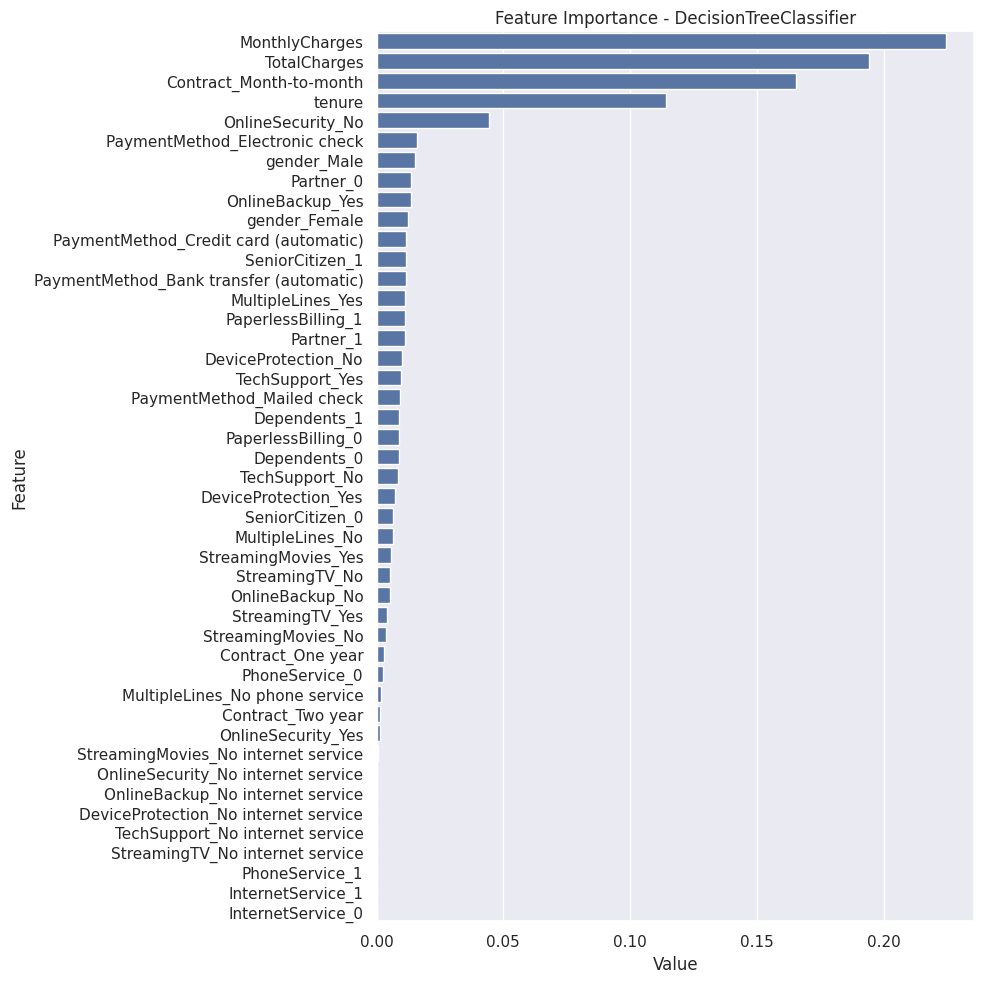

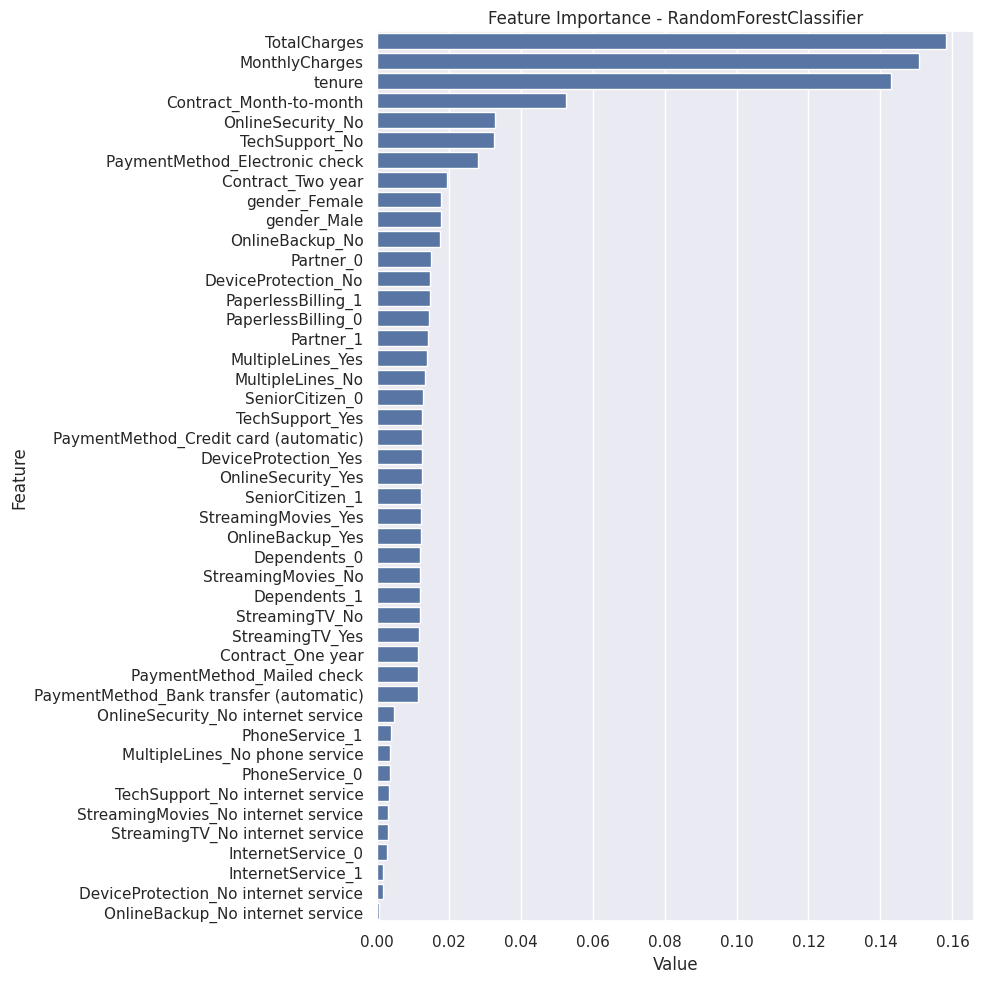

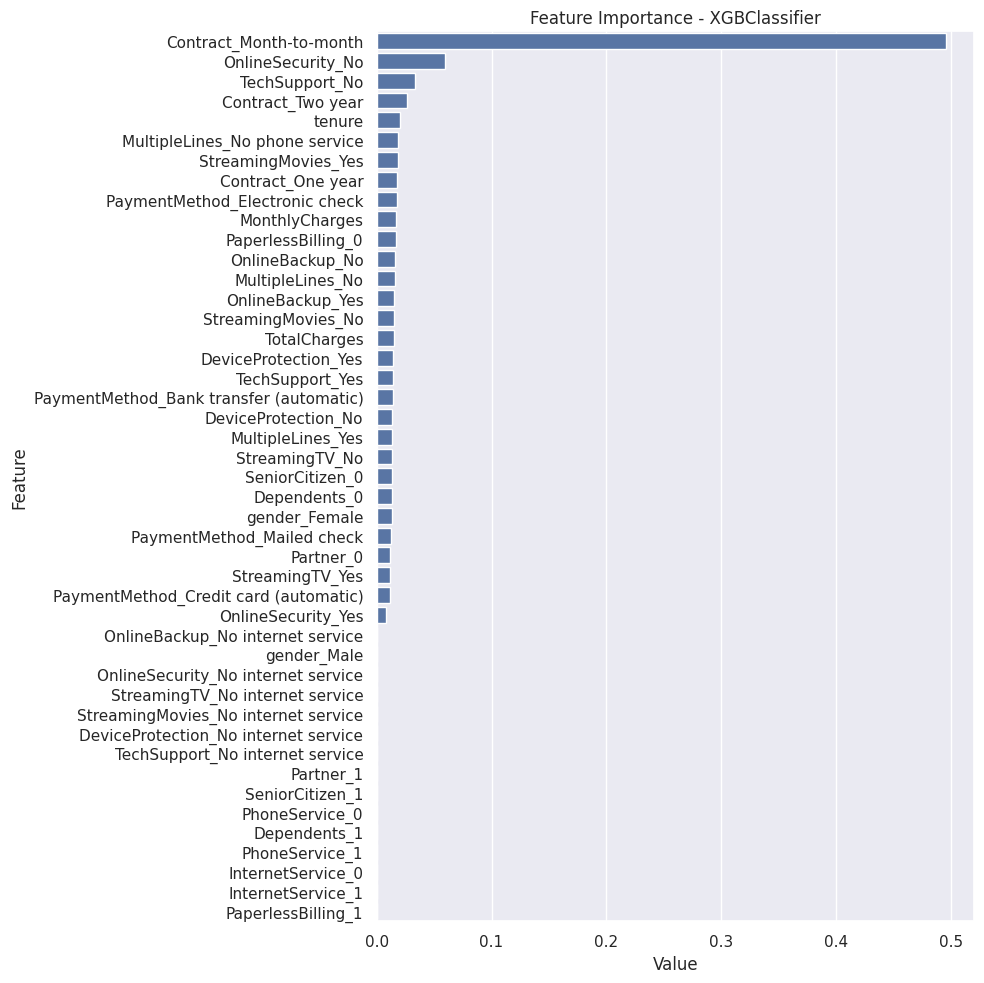

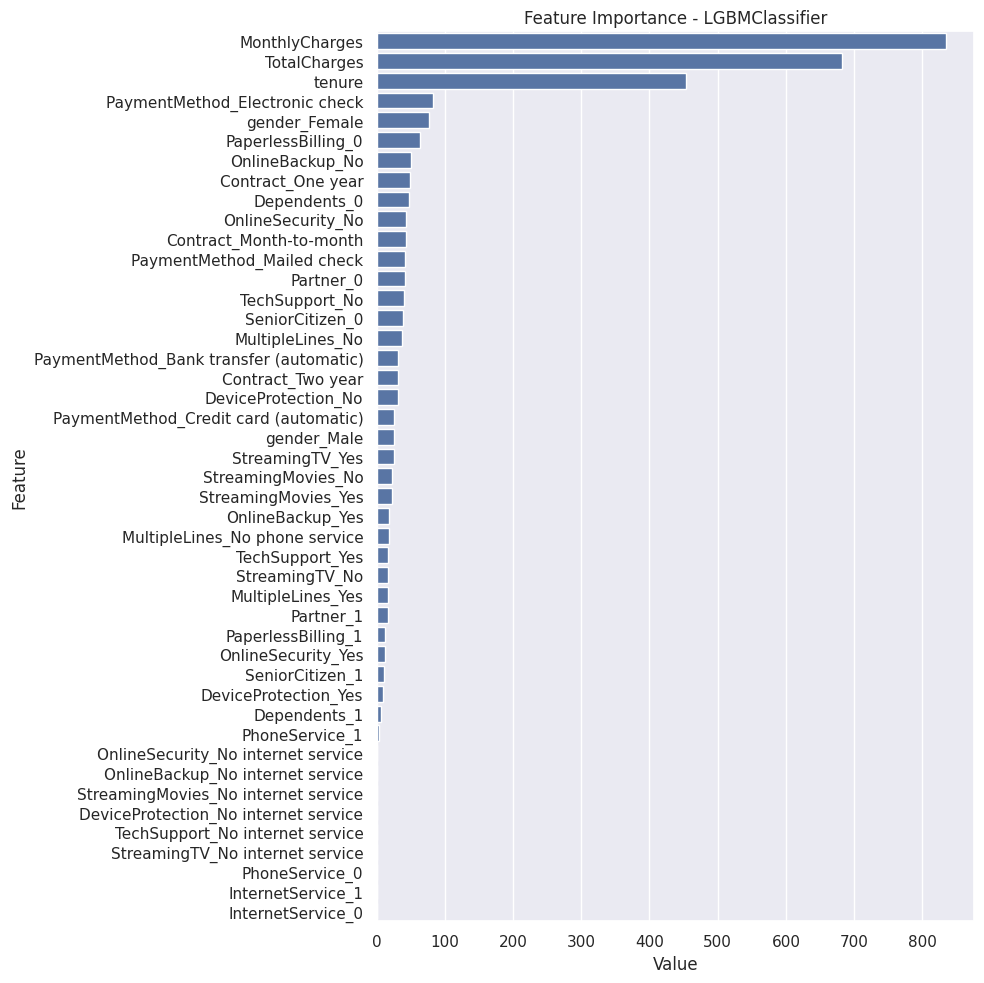

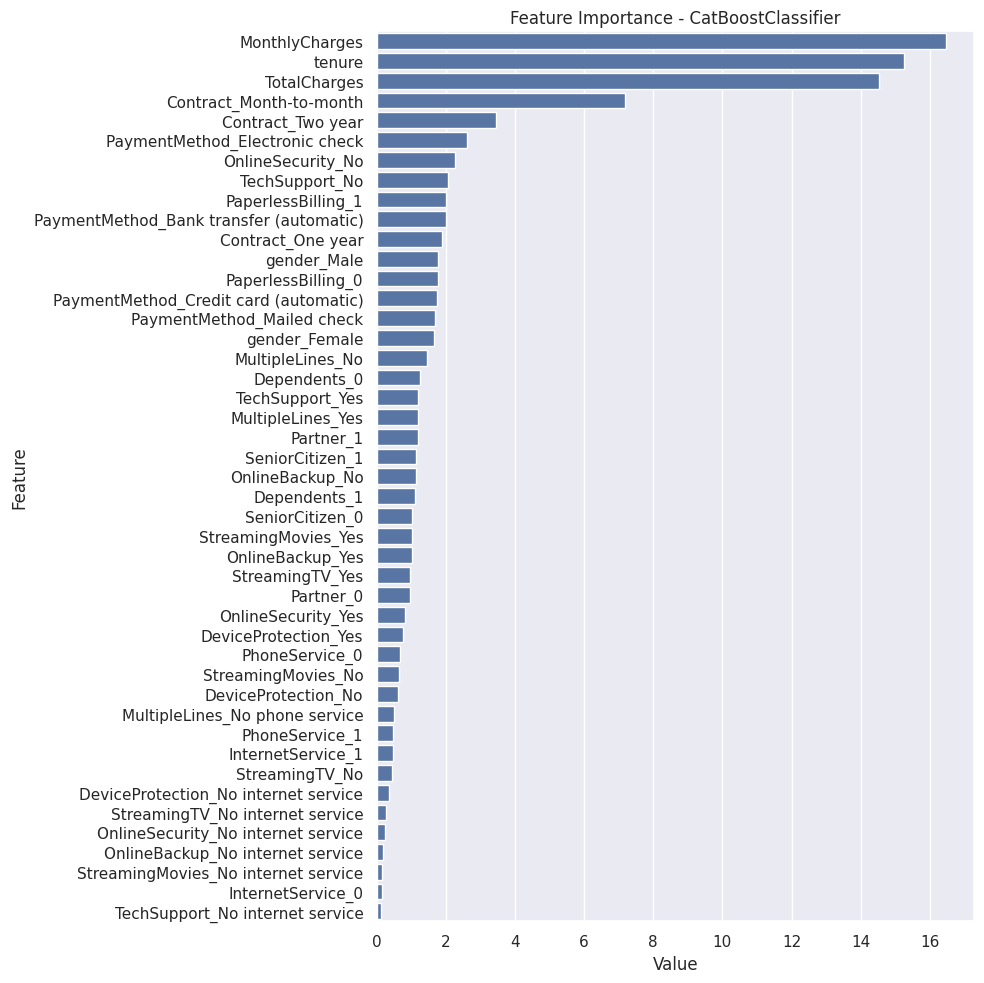

In [60]:
models = [DecisionTreeClassifier(random_state=12345),
         RandomForestClassifier(random_state=12345),
         XGBClassifier(random_state=12345),
         LGBMClassifier(verbose=-1, random_state=12345),
         CatBoostClassifier(verbose=False, random_state=12345)]

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig(f'importances_{model.__class__.__name__}.png')

for model in models:
    model.fit(X, y)
    plot_importance(model, X)


19. Feature Extraction

In [62]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = [1, 2, 3, 4, 5, 6]
df["NEW_TENURE_YEAR"] = pd.cut(df["tenure"], bins=bins, labels=labels, right=True)

In [63]:
df["NEW_Contract_Type"] = df["Contract"].apply(
    lambda x: 2 if x == "Two year" else (1 if x == "One year" else 0))

In [64]:
df["NEW_Young_Not_Contract"] = df.apply(lambda x: 1 if (x["NEW_Contract_Type"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)

In [65]:
df["NEW_Family_Size"] = df["Partner"] + df["Dependents"] + 1

In [66]:
# Total number of services received by the person

df['NEW_TotalServices'] = (df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1) \
                                        + df["InternetService"] + df["PhoneService"]

In [67]:
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if
                                                       x in ["Bank transfer (automatic)","Credit card (automatic)"]
                                                       else 0)

In [68]:
# average monthly payment

df["NEW_AVG_Charges"] = df["TotalCharges"] / df["tenure"]

In [69]:
df["NEW_AVG_Monthly_Charges"] = df["tenure"] / df["MonthlyCharges"]

In [70]:
# Increase in current price compared to average price

df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

In [71]:
# Fee per service

df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)

In [72]:
# People who do not receive any support, backup or protection

df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

In [73]:
# People who receive any streaming service

df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

In [74]:
df.columns = [col.upper() for col in df.columns]

In [75]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,NEW_TENURE_YEAR,NEW_CONTRACT_TYPE,NEW_YOUNG_NOT_CONTRACT,NEW_FAMILY_SIZE,NEW_TOTALSERVICES,NEW_FLAG_AUTOPAYMENT,NEW_AVG_CHARGES,NEW_AVG_MONTHLY_CHARGES,NEW_INCREASE,NEW_AVG_SERVICE_FEE,NEW_NOPROT,NEW_FLAG_ANY_STREAMING
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,1,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0,1,0,1,2,2,0,29.850,0.034,1.000,9.950,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,1,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0,3,1,0,1,4,0,55.574,0.597,0.976,11.390,1,0
2,3668-QPYBK,Male,0,0,0,2,1,No,1,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1,1,0,1,1,4,0,54.075,0.037,1.004,10.770,1,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,1,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0,4,1,0,1,4,1,40.906,1.064,0.967,8.460,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,1,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1,1,0,1,1,2,0,75.825,0.028,1.072,23.567,1,0


20. ENCODING

In [76]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 7043
Variables: 33
cat_cols: 25
num_cols: 7
cat_but_car: 1
num_but_cat: 15


In [77]:
cat_cols

['GENDER',
 'MULTIPLELINES',
 'ONLINESECURITY',
 'ONLINEBACKUP',
 'DEVICEPROTECTION',
 'TECHSUPPORT',
 'STREAMINGTV',
 'STREAMINGMOVIES',
 'CONTRACT',
 'PAYMENTMETHOD',
 'SENIORCITIZEN',
 'PARTNER',
 'DEPENDENTS',
 'PHONESERVICE',
 'INTERNETSERVICE',
 'PAPERLESSBILLING',
 'CHURN',
 'NEW_TENURE_YEAR',
 'NEW_CONTRACT_TYPE',
 'NEW_YOUNG_NOT_CONTRACT',
 'NEW_FAMILY_SIZE',
 'NEW_TOTALSERVICES',
 'NEW_FLAG_AUTOPAYMENT',
 'NEW_NOPROT',
 'NEW_FLAG_ANY_STREAMING']

In [78]:
num_cols

['TENURE',
 'MONTHLYCHARGES',
 'TOTALCHARGES',
 'NEW_AVG_CHARGES',
 'NEW_AVG_MONTHLY_CHARGES',
 'NEW_INCREASE',
 'NEW_AVG_SERVICE_FEE']

In [79]:
cat_but_car

['CUSTOMERID']

In [80]:
num_but_cat

['SENIORCITIZEN',
 'PARTNER',
 'DEPENDENTS',
 'PHONESERVICE',
 'INTERNETSERVICE',
 'PAPERLESSBILLING',
 'CHURN',
 'NEW_TENURE_YEAR',
 'NEW_CONTRACT_TYPE',
 'NEW_YOUNG_NOT_CONTRACT',
 'NEW_FAMILY_SIZE',
 'NEW_TOTALSERVICES',
 'NEW_FLAG_AUTOPAYMENT',
 'NEW_NOPROT',
 'NEW_FLAG_ANY_STREAMING']

In [81]:
# Label Encoding

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [82]:
binary_cols2 = [col for col in df.columns if df[col].dtypes == "O" or df[col].dtypes == "int" and df[col].nunique() == 2]

In [83]:
binary_cols2

['CUSTOMERID',
 'GENDER',
 'SENIORCITIZEN',
 'PARTNER',
 'DEPENDENTS',
 'PHONESERVICE',
 'MULTIPLELINES',
 'INTERNETSERVICE',
 'ONLINESECURITY',
 'ONLINEBACKUP',
 'DEVICEPROTECTION',
 'TECHSUPPORT',
 'STREAMINGTV',
 'STREAMINGMOVIES',
 'CONTRACT',
 'PAPERLESSBILLING',
 'PAYMENTMETHOD',
 'CHURN',
 'NEW_YOUNG_NOT_CONTRACT',
 'NEW_FLAG_AUTOPAYMENT',
 'NEW_NOPROT',
 'NEW_FLAG_ANY_STREAMING']

In [84]:
for col in binary_cols2:
    df = label_encoder(df, col)

In [85]:
# One-Hot Encoding

cat_cols = [col for col in cat_cols if col not in binary_cols2 and col not in ["CHURN", "NEW_TOTALSERVICES"]]

In [86]:
cat_cols

['NEW_TENURE_YEAR', 'NEW_CONTRACT_TYPE', 'NEW_FAMILY_SIZE']

In [87]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [88]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [89]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,NEW_YOUNG_NOT_CONTRACT,NEW_TOTALSERVICES,NEW_FLAG_AUTOPAYMENT,NEW_AVG_CHARGES,NEW_AVG_MONTHLY_CHARGES,NEW_INCREASE,NEW_AVG_SERVICE_FEE,NEW_NOPROT,NEW_FLAG_ANY_STREAMING,NEW_TENURE_YEAR_2,NEW_TENURE_YEAR_3,NEW_TENURE_YEAR_4,NEW_TENURE_YEAR_5,NEW_TENURE_YEAR_6,NEW_CONTRACT_TYPE_1,NEW_CONTRACT_TYPE_2,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3
0,5375,0,0,1,0,1,0,1,1,0,2,0,0,0,0,0,1,2,29.850,29.850,0,1,2,0,29.850,0.034,1.000,9.950,1,0,False,False,False,False,False,False,False,True,False
1,3962,1,0,0,0,34,1,0,1,2,0,2,0,0,0,1,0,3,56.950,1889.500,0,0,4,0,55.574,0.597,0.976,11.390,1,0,False,True,False,False,False,True,False,False,False
2,2564,1,0,0,0,2,1,0,1,2,2,0,0,0,0,0,1,3,53.850,108.150,1,1,4,0,54.075,0.037,1.004,10.770,1,0,False,False,False,False,False,False,False,False,False
3,5535,1,0,0,0,45,0,1,1,2,0,2,2,0,0,1,0,0,42.300,1840.750,0,0,4,1,40.906,1.064,0.967,8.460,1,0,False,False,True,False,False,True,False,False,False
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.700,151.650,1,1,2,0,75.825,0.028,1.072,23.567,1,0,False,False,False,False,False,False,False,False,False


1. Standardization Process¶


In [90]:
df = df.replace([np.inf, -np.inf], 0)

In [91]:
scaler = RobustScaler()

In [92]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [93]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,NEW_YOUNG_NOT_CONTRACT,NEW_TOTALSERVICES,NEW_FLAG_AUTOPAYMENT,NEW_AVG_CHARGES,NEW_AVG_MONTHLY_CHARGES,NEW_INCREASE,NEW_AVG_SERVICE_FEE,NEW_NOPROT,NEW_FLAG_ANY_STREAMING,NEW_TENURE_YEAR_2,NEW_TENURE_YEAR_3,NEW_TENURE_YEAR_4,NEW_TENURE_YEAR_5,NEW_TENURE_YEAR_6,NEW_CONTRACT_TYPE_1,NEW_CONTRACT_TYPE_2,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3
0,5375,0,0,1,0,-0.609,0,1,1,0,2,0,0,0,0,0,1,2,-0.745,-0.405,0,1,2,0,-0.742,-0.683,0.000,-0.458,1,0,False,False,False,False,False,False,False,True,False
1,3962,1,0,0,0,0.109,1,0,1,2,0,2,0,0,0,1,0,3,-0.247,0.144,0,0,4,0,-0.270,0.209,-0.603,-0.221,1,0,False,True,False,False,False,True,False,False,False
2,2564,1,0,0,0,-0.587,1,0,1,2,2,0,0,0,0,0,1,3,-0.304,-0.382,1,1,4,0,-0.298,-0.677,0.104,-0.323,1,0,False,False,False,False,False,False,False,False,False
3,5535,1,0,0,0,0.348,0,1,1,2,0,2,2,0,0,1,0,0,-0.516,0.130,0,0,4,1,-0.539,0.948,-0.823,-0.703,1,0,False,False,True,False,False,True,False,False,False
4,6511,0,0,0,0,-0.587,1,0,1,0,0,0,0,0,0,0,1,2,0.006,-0.369,1,1,2,0,0.101,-0.691,1.809,1.779,1,0,False,False,False,False,False,False,False,False,False



22. Creating Model

In [94]:
y = df["CHURN"]
X = df.drop(["CHURN","CUSTOMERID"], axis=1)

models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))]

last_models_metrics = []

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

    accuracy = round(cv_results['test_accuracy'].mean(), 4)
    auc = round(cv_results['test_roc_auc'].mean(), 4)
    recall = round(cv_results['test_recall'].mean(), 4)
    precision = round(cv_results['test_precision'].mean(), 4)
    f1 = round(cv_results['test_f1'].mean(), 4)

    last_models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    })

    print(f"########## {name} ##########")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1: {f1}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



########## LR ##########
Accuracy: 0.8053
AUC: 0.8468
Recall: 0.5265
Precision: 0.6699
F1: 0.5895
########## KNN ##########
Accuracy: 0.7623
AUC: 0.7724
Recall: 0.5217
Precision: 0.556
F1: 0.5382
########## CART ##########
Accuracy: 0.7274
AUC: 0.6529
Recall: 0.4922
Precision: 0.4864
F1: 0.4892
########## RF ##########
Accuracy: 0.7913
AUC: 0.8242
Recall: 0.4826
Precision: 0.6422
F1: 0.5511
########## XGB ##########
Accuracy: 0.7822
AUC: 0.8226
Recall: 0.5024
Precision: 0.6092
F1: 0.5506
########## LightGBM ##########
Accuracy: 0.7945
AUC: 0.8357
Recall: 0.5163
Precision: 0.6406
F1: 0.5717
########## CatBoost ##########
Accuracy: 0.7958
AUC: 0.8398
Recall: 0.4997
Precision: 0.6504
F1: 0.565


In [95]:
# Dictionary containing the updated metric results
metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [last_models_metrics[0]['Accuracy'], last_models_metrics[1]['Accuracy'],
                 last_models_metrics[2]['Accuracy'], last_models_metrics[3]['Accuracy'],
                 last_models_metrics[4]['Accuracy'], last_models_metrics[5]['Accuracy'],
                 last_models_metrics[6]['Accuracy']],
    "AUC": [last_models_metrics[0]['AUC'], last_models_metrics[1]['AUC'],
            last_models_metrics[2]['AUC'], last_models_metrics[3]['AUC'],
            last_models_metrics[4]['AUC'], last_models_metrics[5]['AUC'],
            last_models_metrics[6]['AUC']],
    "Recall": [last_models_metrics[0]['Recall'], last_models_metrics[1]['Recall'],
               last_models_metrics[2]['Recall'], last_models_metrics[3]['Recall'],
               last_models_metrics[4]['Recall'], last_models_metrics[5]['Recall'],
               last_models_metrics[6]['Recall']],
    "Precision": [last_models_metrics[0]['Precision'], last_models_metrics[1]['Precision'],
                  last_models_metrics[2]['Precision'], last_models_metrics[3]['Precision'],
                  last_models_metrics[4]['Precision'], last_models_metrics[5]['Precision'],
                  last_models_metrics[6]['Precision']],
    "F1": [last_models_metrics[0]['F1'], last_models_metrics[1]['F1'],
           last_models_metrics[2]['F1'], last_models_metrics[3]['F1'],
           last_models_metrics[4]['F1'], last_models_metrics[5]['F1'],
           last_models_metrics[6]['F1']]
}

# Creating a DataFrame from the updated metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models After Feature Engineering"
)

# Displaying the graph
fig.show(block=True)

24. Feature Importance

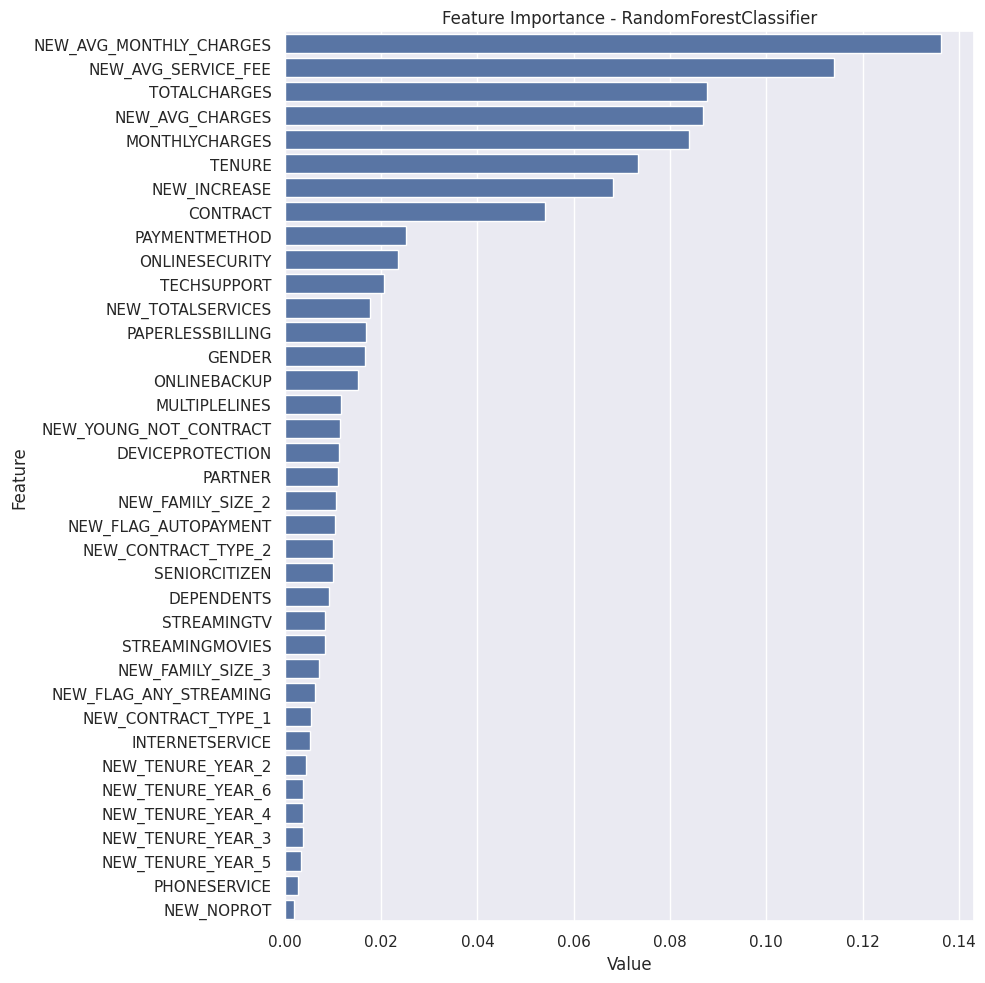

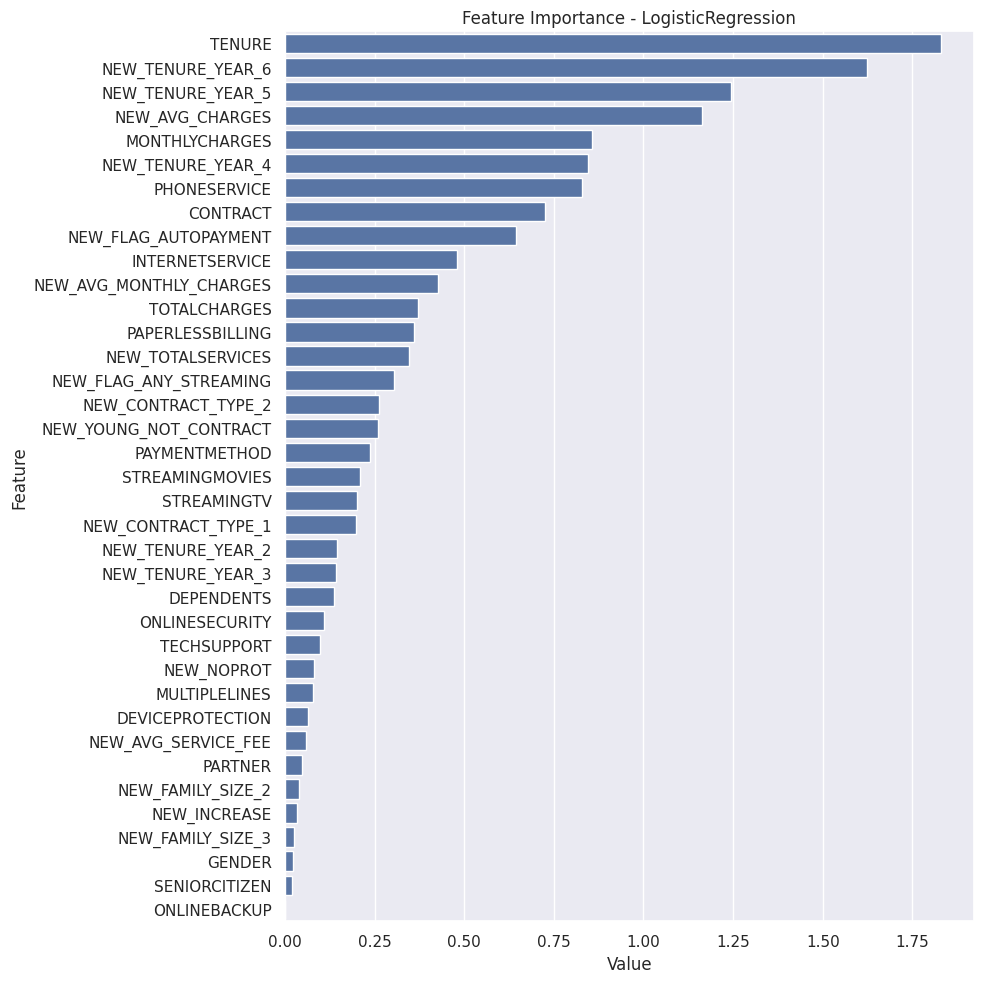

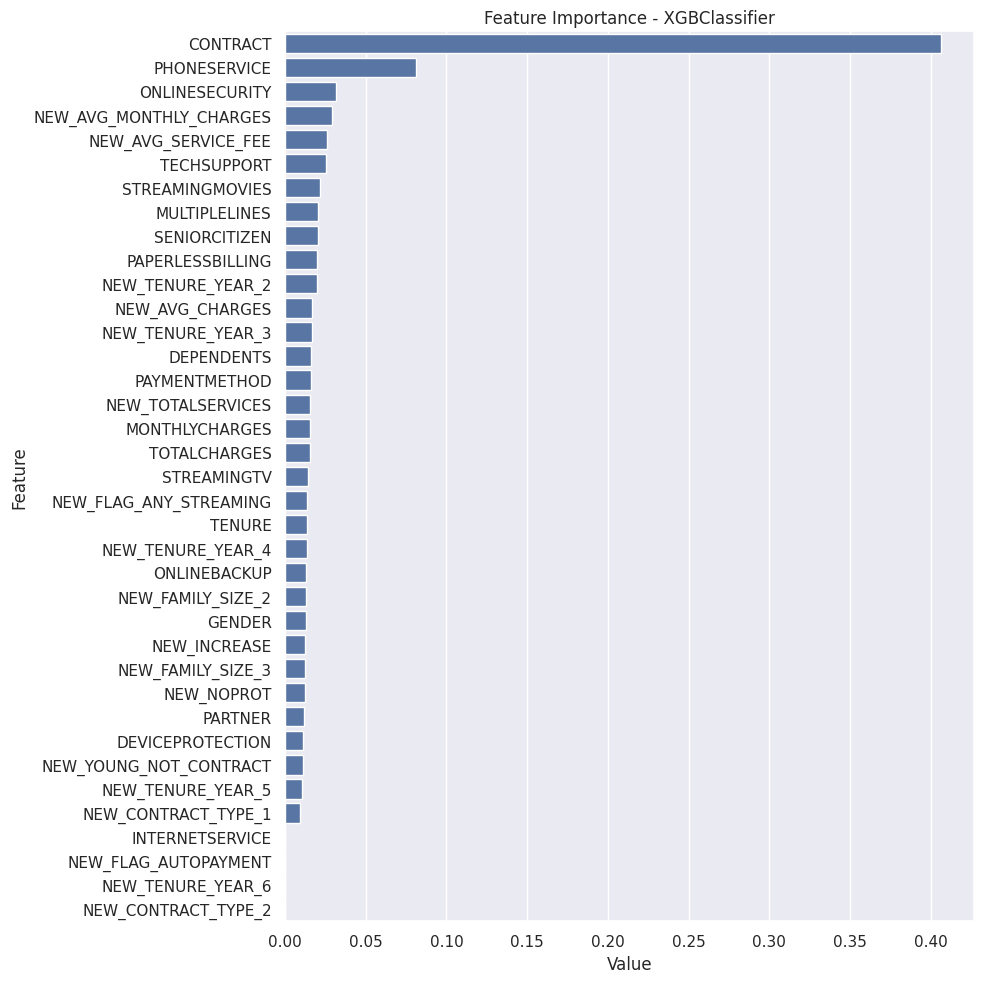

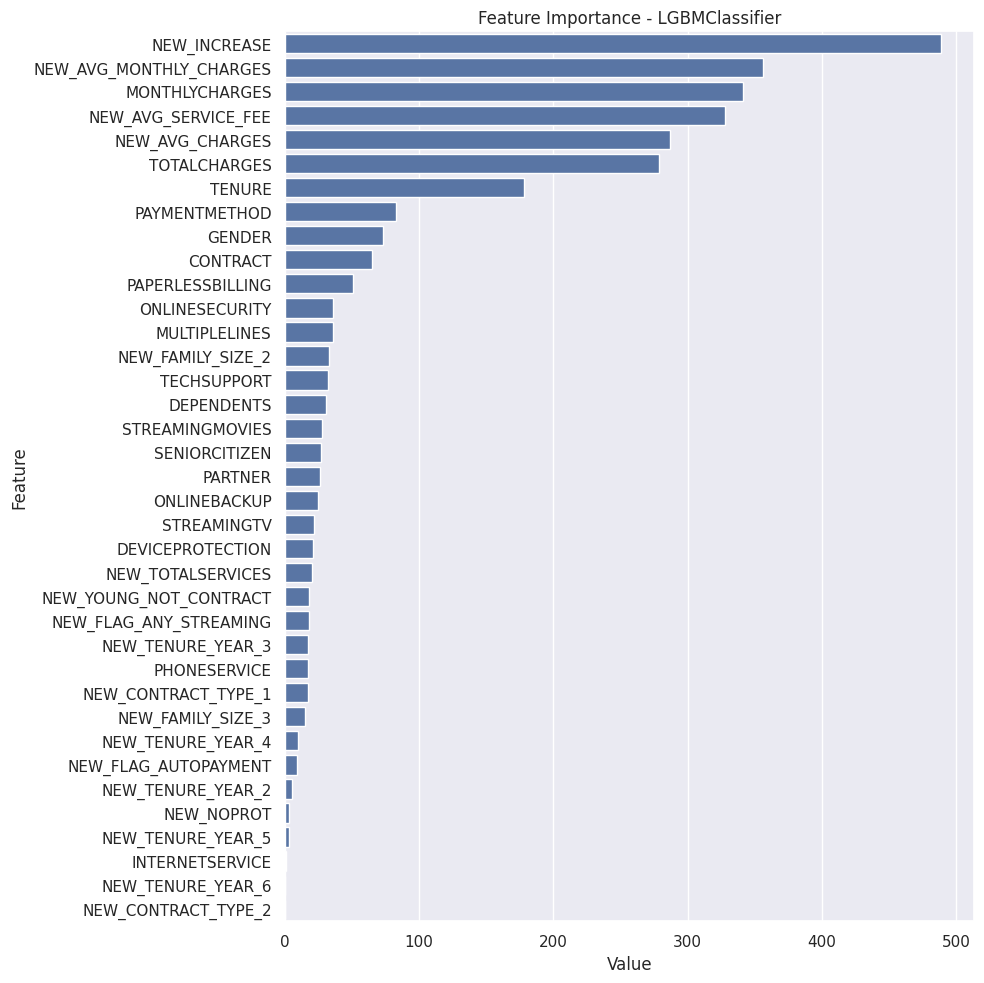

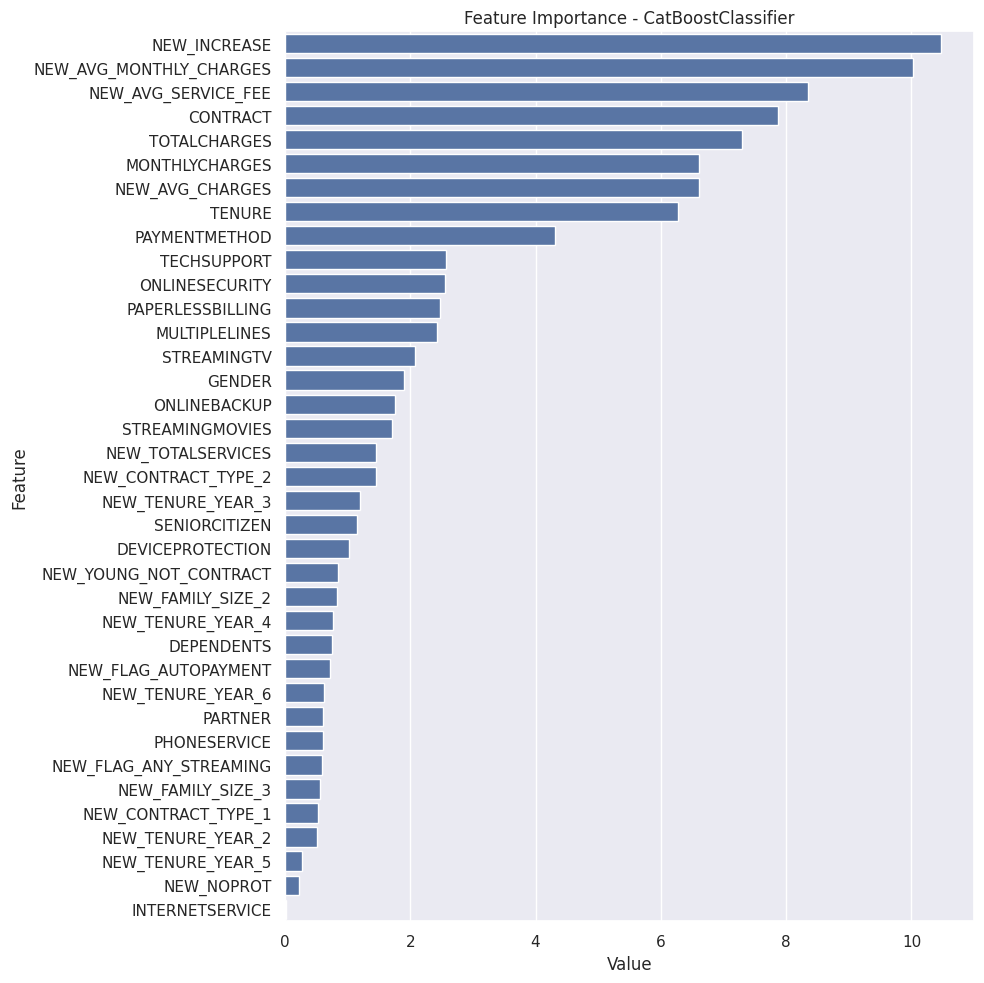

In [96]:
def plot_importance(model, features, num=None, save=False):
    # Plotlanacak özellik sayısını varsayılan olarak sütun sayısı olarak ayarla
    if num is None:
        num = len(features.columns)

    # Modelin feature importance özelliğini kontrol et
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # LogisticRegression gibi modeller için
        importances = model.coef_[0] if model.coef_.ndim == 2 else model.coef_
        importances = np.abs(importances)
    else:
        print(f"{model.__class__.__name__} modelinde özellik önem değerleri bulunamadı.")
        return

    feature_imp = pd.DataFrame({'Value': importances, 'Feature': features.columns})

    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature",
                data=feature_imp.sort_values(by="Value", ascending=False).iloc[:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    if save:
        plt.savefig(f'importances_{model.__class__.__name__}.png')
    plt.show()

# Örnek kullanım:
models = [RandomForestClassifier(),
          LogisticRegression(),
          XGBClassifier(),
          LGBMClassifier(),
          CatBoostClassifier(verbose=False, random_state=12345)
         ]

for model in models:
    model.fit(X, y)
    plot_importance(model, X)




23. Comparison of Metrics for Different Models After Feature Engineering

In [97]:
# Dictionary containing the updated metric results
base_metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [base_models_metrics[0]['Accuracy'], base_models_metrics[1]['Accuracy'],
                 base_models_metrics[2]['Accuracy'], base_models_metrics[3]['Accuracy'],
                 base_models_metrics[4]['Accuracy'], base_models_metrics[5]['Accuracy'],
                 base_models_metrics[6]['Accuracy']],
    "AUC": [base_models_metrics[0]['AUC'], base_models_metrics[1]['AUC'],
            base_models_metrics[2]['AUC'], base_models_metrics[3]['AUC'],
            base_models_metrics[4]['AUC'], base_models_metrics[5]['AUC'],
            base_models_metrics[6]['AUC']],
    "Recall": [base_models_metrics[0]['Recall'], base_models_metrics[1]['Recall'],
               base_models_metrics[2]['Recall'], base_models_metrics[3]['Recall'],
               base_models_metrics[4]['Recall'], base_models_metrics[5]['Recall'],
               base_models_metrics[6]['Recall']],
    "Precision": [base_models_metrics[0]['Precision'], base_models_metrics[1]['Precision'],
                  base_models_metrics[2]['Precision'], base_models_metrics[3]['Precision'],
                  base_models_metrics[4]['Precision'], base_models_metrics[5]['Precision'],
                  base_models_metrics[6]['Precision']],
    "F1": [base_models_metrics[0]['F1'], base_models_metrics[1]['F1'],
           base_models_metrics[2]['F1'], base_models_metrics[3]['F1'],
           base_models_metrics[4]['F1'], base_models_metrics[5]['F1'],
           base_models_metrics[6]['F1']]
}

last_metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [last_models_metrics[0]['Accuracy'], last_models_metrics[1]['Accuracy'],
                 last_models_metrics[2]['Accuracy'], last_models_metrics[3]['Accuracy'],
                 last_models_metrics[4]['Accuracy'], last_models_metrics[5]['Accuracy'],
                 last_models_metrics[6]['Accuracy']],
    "AUC": [last_models_metrics[0]['AUC'], last_models_metrics[1]['AUC'],
            last_models_metrics[2]['AUC'], last_models_metrics[3]['AUC'],
            last_models_metrics[4]['AUC'], last_models_metrics[5]['AUC'],
            last_models_metrics[6]['AUC']],
    "Recall": [last_models_metrics[0]['Recall'], last_models_metrics[1]['Recall'],
               last_models_metrics[2]['Recall'], last_models_metrics[3]['Recall'],
               last_models_metrics[4]['Recall'], last_models_metrics[5]['Recall'],
               last_models_metrics[6]['Recall']],
    "Precision": [last_models_metrics[0]['Precision'], last_models_metrics[1]['Precision'],
                  last_models_metrics[2]['Precision'], last_models_metrics[3]['Precision'],
                  last_models_metrics[4]['Precision'], last_models_metrics[5]['Precision'],
                  last_models_metrics[6]['Precision']],
    "F1": [last_models_metrics[0]['F1'], last_models_metrics[1]['F1'],
           last_models_metrics[2]['F1'], last_models_metrics[3]['F1'],
           last_models_metrics[4]['F1'], last_models_metrics[5]['F1'],
           last_models_metrics[6]['F1']]
}

# Creating DataFrames from the metric dictionaries
base_results_df = pd.DataFrame(base_metrics)
last_results_df = pd.DataFrame(last_metrics)

# Calculating the improvement percentages for each metric
improvement_df = pd.DataFrame()
improvement_df["Model"] = base_results_df["Model"]
improvement_df["Accuracy"] = ((last_results_df["Accuracy"] - base_results_df["Accuracy"]) / base_results_df["Accuracy"]) * 100
improvement_df["AUC"] = ((last_results_df["AUC"] - base_results_df["AUC"]) / base_results_df["AUC"]) * 100
improvement_df["Recall"] = ((last_results_df["Recall"] - base_results_df["Recall"]) / base_results_df["Recall"]) * 100
improvement_df["Precision"] = ((last_results_df["Precision"] - base_results_df["Precision"]) / base_results_df["Precision"]) * 100
improvement_df["F1"] = ((last_results_df["F1"] - base_results_df["F1"]) / base_results_df["F1"]) * 100

# Sorting the DataFrame by accuracy improvement in descending order
improvement_df = improvement_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=improvement_df["Model"],
        y=improvement_df[metric],
        marker_color=color,
        name=metric,
        text=improvement_df[metric].apply(lambda x: f"{round(x, 2)}%"),
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Improvement Percentage",
    title="Metric Improvement Comparison After Feature Engineering"
)

# Displaying the graph
fig.show(block=True)

Hyperparameter Optimization

In [98]:


lr_params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
knn_params = {"n_neighbors": [3, 5, 7]}
cart_params = {"max_depth": [3, 5, 7]}
rf_params = {"n_estimators": [100, 300, 500]}
xgb_params = {"learning_rate": [0.01, 0.1], "max_depth": [3, 5, 7]}
lgbm_params = {"learning_rate": [0.01, 0.1], "n_estimators": [100, 300, 500]}
catboost_params = {"iterations": [200, 500], "learning_rate": [0.01, 0.1], "depth": [3, 6]}

classifiers = [
    ("LR", LogisticRegression(), lr_params),
    ("KNN", KNeighborsClassifier(), knn_params),
    ("CART", DecisionTreeClassifier(), cart_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("XGB", XGBClassifier(), xgb_params),
    ("LGBM", LGBMClassifier(verbose=-1), lgbm_params),
    ("CatBoost", CatBoostClassifier(verbose=False), catboost_params)
]

def hyperparameter_optimization(X, y, cv=5, scoring="accuracy"):
    print("Hyperparameter Optimization")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} #########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X,y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After) : {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models, final_model

best_models, final_model = hyperparameter_optimization(X, y)



Hyperparameter Optimization
########## LR #########


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



accuracy (Before): 0.8053


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



accuracy (After) : 0.8053
LR best params: {'C': 1}

########## KNN #########
accuracy (Before): 0.7623
accuracy (After) : 0.7643
KNN best params: {'n_neighbors': 7}

########## CART #########
accuracy (Before): 0.7309
accuracy (After) : 0.7865
CART best params: {'max_depth': 5}

########## RF #########
accuracy (Before): 0.7903
accuracy (After) : 0.7917
RF best params: {'n_estimators': 500}

########## XGB #########
accuracy (Before): 0.7822
accuracy (After) : 0.7992
XGB best params: {'learning_rate': 0.1, 'max_depth': 3}

########## LGBM #########
accuracy (Before): 0.7945
accuracy (After) : 0.7991
LGBM best params: {'learning_rate': 0.01, 'n_estimators': 500}

########## CatBoost #########
accuracy (Before): 0.7975
accuracy (After) : 0.8036
CatBoost best params: {'depth': 3, 'iterations': 500, 'learning_rate': 0.01}



In [99]:
final_model

Final Model

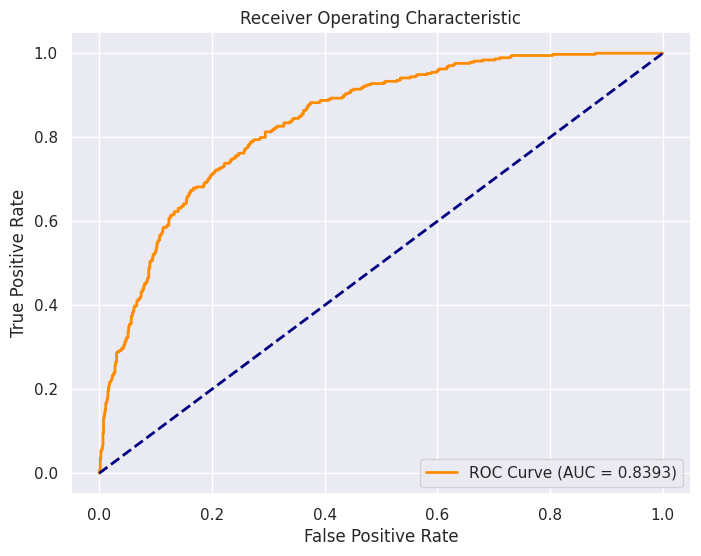

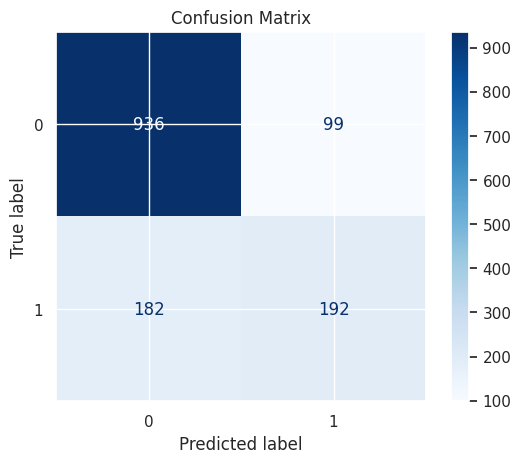

Final Model Performance on Test Set
-------------------------------------
Accuracy : 0.8006
Recall   : 0.5134
Precision: 0.6598
F1 Score : 0.5774
AUC      : 0.8393


In [100]:
from sklearn.metrics import roc_curve, auc as calc_auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=12345
)

# We retrain the final model with training data
final_model.fit(X_train, y_train)

# Predictions
y_final_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = calc_auc(fpr, tpr)

# ROC Curve Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC Curve (AUC = %0.4f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Performance metrics
accuracy = accuracy_score(y_test, y_final_pred)
recall = recall_score(y_test, y_final_pred)
precision = precision_score(y_test, y_final_pred)
f1 = f1_score(y_test, y_final_pred)
auc_score = roc_auc_score(y_test, y_proba)

print("Final Model Performance on Test Set")
print("-------------------------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc_score:.4f}")

In [101]:
# First split the data into train-test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Updated hyperparameter ranges
lr_params = {"C": np.logspace(-4, 4, 20), "penalty": ["l1", "l2"], "solver": ["liblinear"]}
knn_params = {"n_neighbors": np.arange(3, 30, 2), "weights": ["uniform", "distance"]}
cart_params = {"max_depth": np.arange(3, 15), "min_samples_split": [2, 5, 10]}
rf_params = {"n_estimators": [200, 400, 600], "max_depth": [5, 10, None], "min_samples_split": [2, 5]}
xgb_params = {"learning_rate": [0.001, 0.01, 0.1], "max_depth": [3, 5, 7], "gamma": [0, 0.1, 0.2]}
#lgbm_params = {"learning_rate": [0.001, 0.01], "n_estimators": [400, 600], "num_leaves": [31, 63]}
catboost_params = {"iterations": [500, 1000], "learning_rate": [0.001, 0.01], "depth": [3, 6]}

classifiers = [
    ("LR", LogisticRegression(), lr_params),
    ("KNN", KNeighborsClassifier(), knn_params),
    ("CART", DecisionTreeClassifier(), cart_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("XGB", XGBClassifier(eval_metric='logloss'), xgb_params),
    #("LGBM", LGBMClassifier(verbose=-1), lgbm_params),
    ("CatBoost", CatBoostClassifier(verbose=False), catboost_params)
]

def optimized_hyperparameter_tuning(X_train, y_train):
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"\n🔍 {name} Hyperparameter Optimization...")

        # Recall
        search = RandomizedSearchCV(
            classifier, params,
            n_iter=20,
            scoring='recall',
            cv=5,
            n_jobs=-1,
            random_state=42
        ).fit(X_train, y_train)

        best_model = search.best_estimator_
        best_models[name] = best_model

        print(f"🏆 Best params: {search.best_params_}")
        print(f"✅ Best Recall (CV): {search.best_score_:.4f}")

    return best_models

best_models = optimized_hyperparameter_tuning(X_train, y_train)

# Threshold optimization
def find_optimal_threshold(model, X_val, y_val):
    y_proba = model.predict_proba(X_val)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_val, y_proba)

    # Threshold that maximizes F1 score
    f1_scores = 2*(precision*recall)/(precision+recall+1e-9)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    return optimal_threshold

# Choose The Best Model
final_model = best_models['CatBoost']

# Optimal threshold
optimal_threshold = find_optimal_threshold(final_model, X_train, y_train)

# Predictions on the test set
y_proba = final_model.predict_proba(X_test)[:,1]
y_final_pred = (y_proba >= optimal_threshold).astype(int)

# Performance metrics
print("\n📊 Final Model Performance (Optimized Threshold)")
print(classification_report(y_test, y_final_pred))
print(f"🎯 Optimal Threshold: {optimal_threshold:.4f}")


🔍 LR Hyperparameter Optimization...
🏆 Best params: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10000.0}
✅ Best Recall (CV): 0.5385

🔍 KNN Hyperparameter Optimization...
🏆 Best params: {'weights': 'uniform', 'n_neighbors': 25}
✅ Best Recall (CV): 0.5438

🔍 CART Hyperparameter Optimization...
🏆 Best params: {'min_samples_split': 2, 'max_depth': 13}
✅ Best Recall (CV): 0.5271

🔍 RF Hyperparameter Optimization...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.



🏆 Best params: {'n_estimators': 400, 'min_samples_split': 2, 'max_depth': None}
✅ Best Recall (CV): 0.5037

🔍 XGB Hyperparameter Optimization...
🏆 Best params: {'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1}
✅ Best Recall (CV): 0.5197

🔍 CatBoost Hyperparameter Optimization...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.



🏆 Best params: {'learning_rate': 0.01, 'iterations': 1000, 'depth': 3}
✅ Best Recall (CV): 0.5211

📊 Final Model Performance (Optimized Threshold)
              precision    recall  f1-score   support

           0       0.89      0.81      0.84      1035
           1       0.57      0.71      0.63       374

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409

🎯 Optimal Threshold: 0.3562


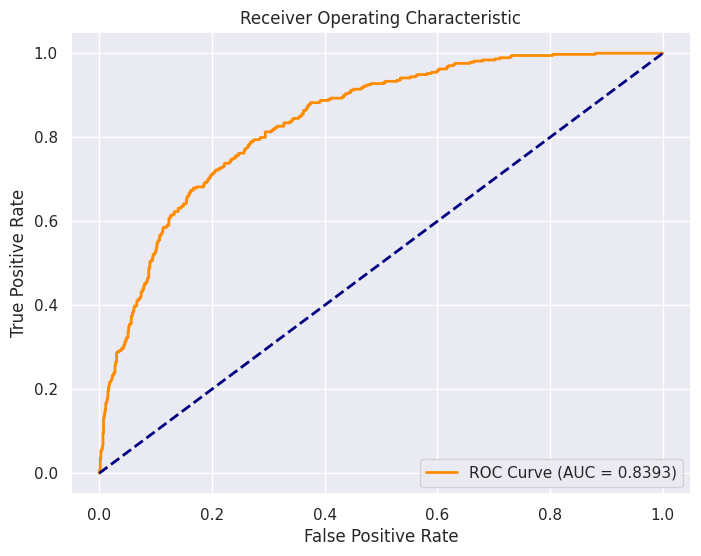

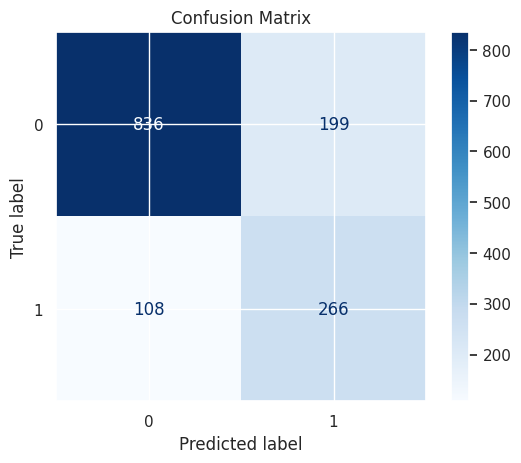

Final Model Performance on Test Set
-------------------------------------
Accuracy : 0.7821
Recall   : 0.7112
Precision: 0.5720
F1 Score : 0.6341
AUC      : 0.8479


In [102]:
# ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC Curve (AUC = %0.4f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Confussion matrix
cm = confusion_matrix(y_test, y_final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Performance metrics
accuracy = accuracy_score(y_test, y_final_pred)
recall = recall_score(y_test, y_final_pred)
precision = precision_score(y_test, y_final_pred)
f1 = f1_score(y_test, y_final_pred)
auc_score = roc_auc_score(y_test, y_proba)

print("Final Model Performance on Test Set")
print("-------------------------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc_score:.4f}")